<a href="https://colab.research.google.com/github/Adelina2373/Machine_Learning/blob/main/Lab_2_2373_%D0%A7%D0%B5%D0%BA%D1%81%D1%82%D0%B5%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Описание атрибутов датасета:
В выбранном датасете представлены два атрибута:
- **Стоимость**: представляет собой стоимость за конкретное произведение. Тип данных - числовой.
- **Рейтинг**: представляет собой значение в рейтинге произведения относительно других книг среди бестселлеров. Тип данных - числовой.
  
Добавим новые атрибуты на основе предыдущих: **средний рейтинг** и **изменение стоимости в зависимости от рейтинга**.

In [11]:
import pandas as pd

# Чтение данных из CSV-файла
df = pd.read_csv('BestSeller_Books_of_Amazon.csv', delimiter=',')

# Добавление нового атрибута со среднегодовой пропорцией
df['Average_Rating'] = df['Rating'].mean()

# Добавление нового атрибута с изменением пропорции по сравнению с предыдущим годом
df['Change_Rating_from_Price'] = df['Rating'].diff()

print(df)

                                             Book_Name  \
0    Maths Concept King All Formulas and Theorum | ...   
1    BlackBook of English Vocabulary May 2024 by Ni...   
2    Atomic Habits : the life-changing million-copy...   
3    My First Library: Boxset of 10 Board Books for...   
4    Lucent General Knowledge - New Reduced Price E...   
..                                                 ...   
395            Shrimad Bhagwat Geeta Yatharoop (Hindi)   
396  Educart CBSE Class 10 One Shot Question Bank 2...   
397  How to Win Friends and Influence People : Orig...   
398                                    RAM C/O ANANDHI   
399  SSC TCS PYQs Mathematics Chapterwise & Typewis...   

                              Author_Name  Rating  Price  Average_Rating  \
0                        Gagan Pratap Sir     4.7  239.9            4.46   
1                            Nikhil Gupta     4.5   29.9            4.46   
2                             James Clear     4.6  476.9            4.46   

В данном случае, у нас нет выбросов и пропущенных значений, поэтому мы можем перейти к построению графиков для анализа кластеров.

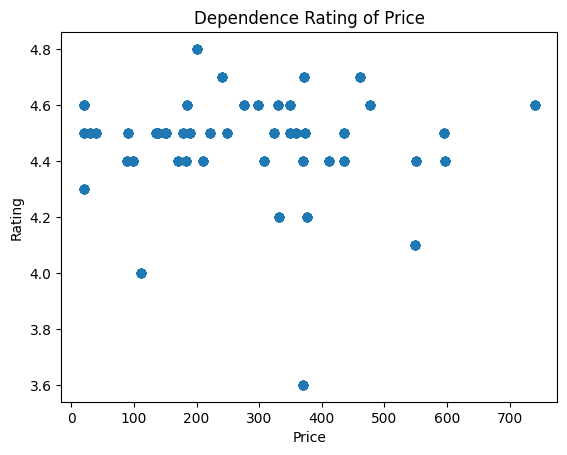

In [12]:
import matplotlib.pyplot as plt

# График зависимости пропорции от года
plt.scatter(df['Price'], df['Rating'])
plt.title('Dependence Rating of Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

На графике мы можем увидеть, что данные можно разделить на три основные группы: **низкая стоимость, средняя и высокая стоимость.**

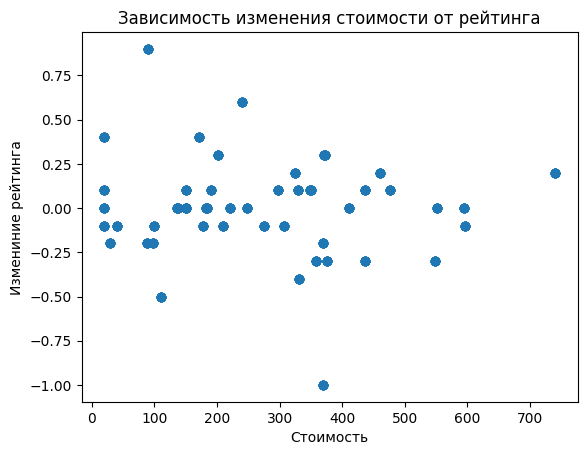

In [13]:
# График зависимости изменения пропорции от года
plt.scatter(df['Price'], df['Change_Rating_from_Price'])
plt.title('Зависимость изменения стоимости от рейтинга')
plt.xlabel('Стоимость')
plt.ylabel('Измениние рейтинга')
plt.show()

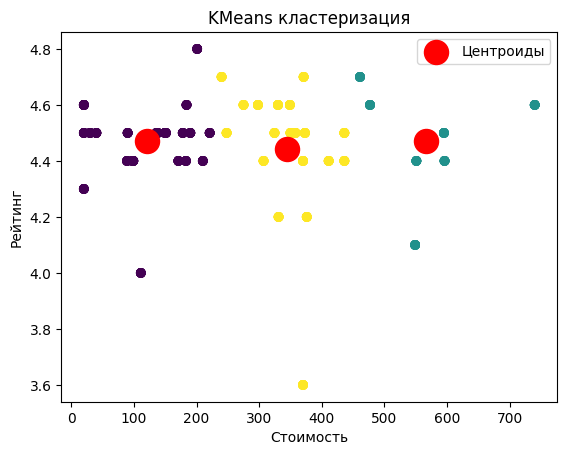

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Подготовка данных для кластеризации
X = np.array(df[['Price', 'Rating']])

# Создание модели KMeans с явным указанием значения n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)

# Получение меток кластеров для каждой точки данных
labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Центроиды')
plt.title('KMeans кластеризация')
plt.xlabel('Стоимость')
plt.ylabel('Рейтинг')
plt.legend()
plt.show()

Мы получили график, на котором отображены точки данных в соответствии с их кластерами, а также центроиды кластеров.

## Выводы:

1. Метод KMeans позволяет эффективно кластеризовать данные, выделяя группы схожих точек внутри датасета.
2. В данном случае, применение KMeans позволило нам выделить три основные группы точек данных, которые соответствуют трем различным кластерам. Изменение пропорции было добавлено в анализ и позволило выявить тенденции и динамику изменений стоимости в зависимости от рейинга.
3. Кластеризация помогает визуализировать структуру данных, что позволяет лучше понять их характеристики.
4. Результаты кластеризации могут быть использованы для принятия решений, анализа тенденций и выявления закономерностей в данных.

*Таким образом, применение метода KMeans к датасету "BestSeller Books of Amazon" помогло выявить важные группы данных и позволило провести более детальный анализ динамики стоимости в различных группах рейтинга, а также получить лучшее понимание их структуры.*